<h1 align=center>Predicting the Compressive Strength of Concrete </h1>

### About the Dataset:

*Concrete Compressive Strength Dataset*

Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. 
- Number of instances 1030
- Number of Attributes 9
- Attribute breakdown 8 quantitative input variables, and 1 quantitative output variable 

The aim of the dataset is to predict concrete compressive strength of high performance concrete (HPC). HPC does not always means high strength but covers all kinds of concrete for special applications that are not possible with standard concretes. Therefore, our target value is:

**Target y**
- Concrete compressive strength [MPa]

In this case the compressive strength is the cylindrical compressive strength meaning a cylindrical sample (15 cm diameter; 30 cm height) was used for testing. The value is a bit smaller than testing on cubic samples. Both tests assess the uniaxial compressive strength. Usually, we get both values if we buy concrete.

To predict compressive strengths, we have these features available:

**Input X**:
- Cement $[\frac{kg}{m^3}]$
- Blast furnace slag $[\frac{kg}{m^3}]$
- Fly ask $[\frac{kg}{m^3}]$
- Water $[\frac{kg}{m^3}]$
- Plasticizer $[\frac{kg}{m^3}]$
- Coarse aggregate $[\frac{kg}{m^3}]$
- Fine aggregate $[\frac{kg}{m^3}]$
- Age $[d]$

### Task 1: Introduction 

In [1]:
# Standard imports
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import warnings
import numpy as np
from pylab import rcParams
import seaborn as sns; sns.set(style="ticks", color_codes=True)
rcParams['figure.figsize'] = 15, 10

warnings.simplefilter('ignore')

In [1]:
#!pip install yellowbrick

### Task 2: Dataset Exploration

In [2]:
df = pd.read_csv('concrete.csv')
df.head()

,cement,slag,ash,water,splast,coarse,fine,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
df.describe()

,cement,slag,ash,water,splast,coarse,fine,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


### Task 3: Preprocessing the Data

In [4]:
df.columns

Index(['cement', 'slag', 'ash', 'water', 'splast', 'coarse', 'fine', 'age',
       'strength'],
      dtype='object')

In [5]:
features = df.columns.tolist()[:8]
target = 'strength'

X= df[features]
y = df[target]

### Task 4: Pairwise Scatterplot

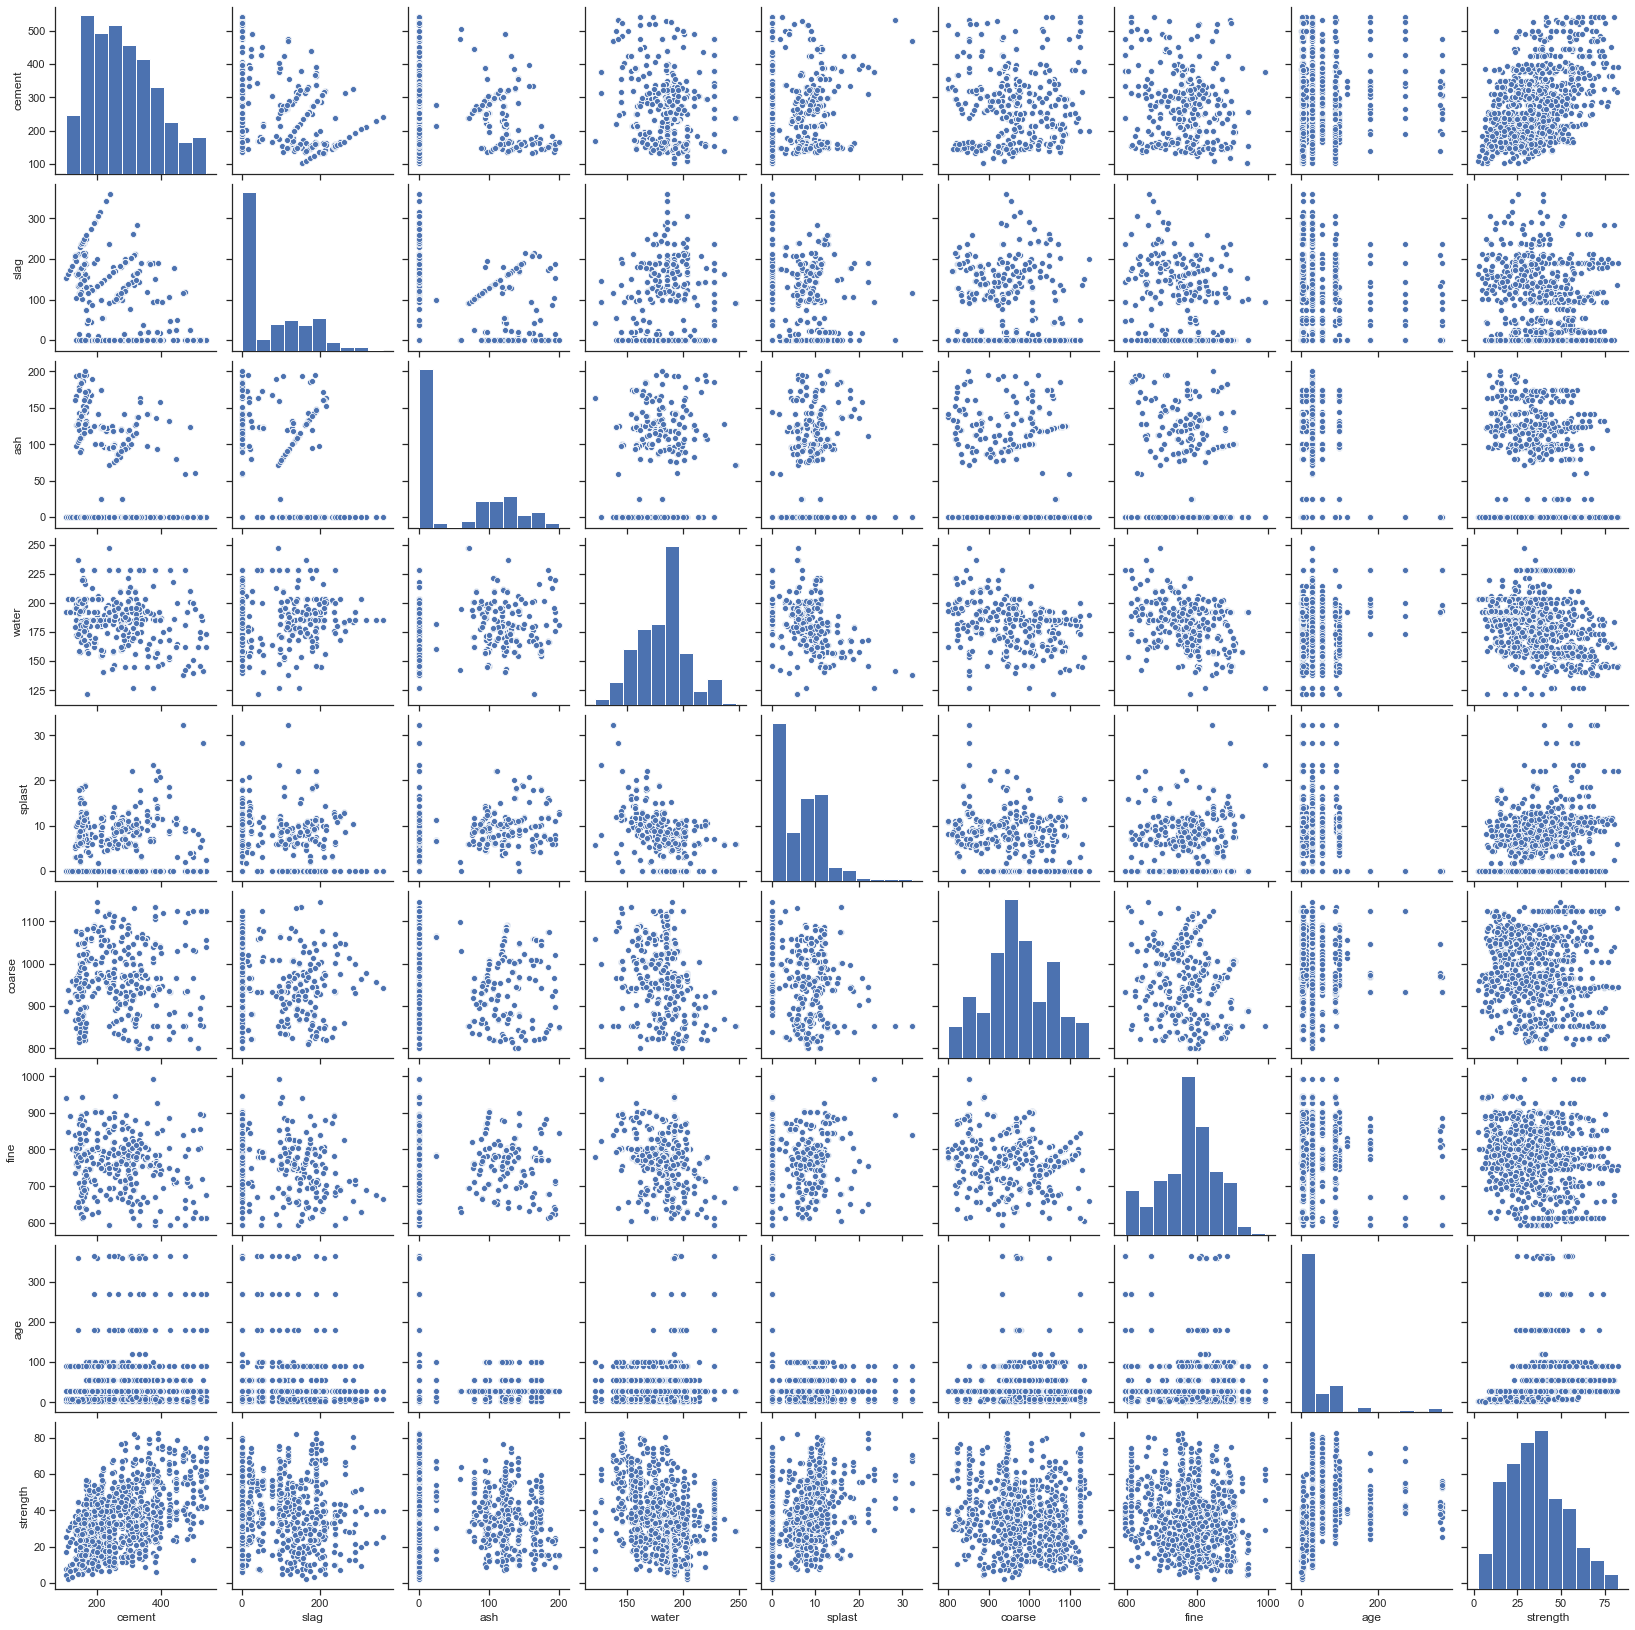

In [6]:
sns.pairplot(df)

### Task 5: Feature Importances

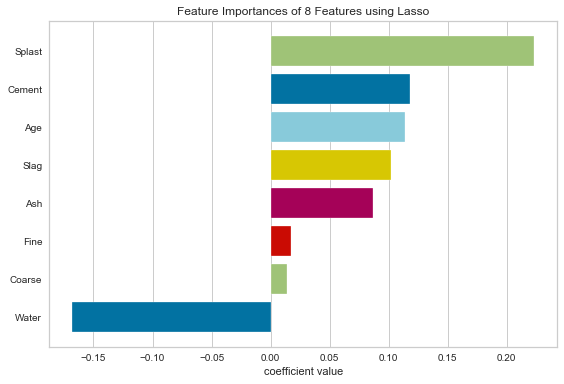

In [8]:
from yellowbrick.model_selection import FeatureImportances
from sklearn.linear_model import Lasso

fig= plt.figure()
ax = fig.add_subplot()

labels = list(map(lambda s: s.title(), features))
viz = FeatureImportances(Lasso(), ax= ax, labels = labels, relative = False )

viz.fit(X,y)
viz.poof()

### Task 6: Target Visualization

BalancedBinningReference(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001AC973730B8>,
                         bins=4, target='y')

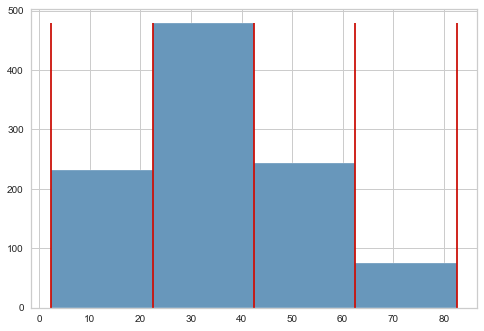

In [9]:
from yellowbrick.target import BalancedBinningReference
visualizer = BalancedBinningReference()
visualizer.fit(y)

### Task 7: Evaluating Lasso Regression

In [10]:
from yellowbrick.regressor import PredictionError
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

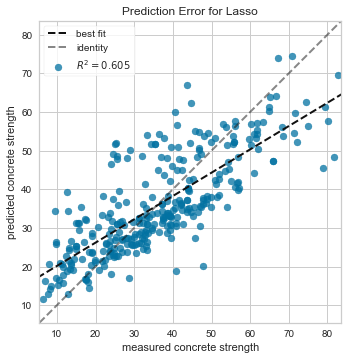

In [13]:
visualizer = PredictionError(Lasso(), size=(600,400))
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)

visualizer.finalize()

visualizer.ax.set_xlabel("measured concrete strength")
visualizer.ax.set_ylabel("predicted concrete strength");

### Task 8: Visualization of Test-set Errors

Using YellowBrick we can show the residuals (difference between the predicted value and the truth) both for the training set and the testing set (respectively blue and green).


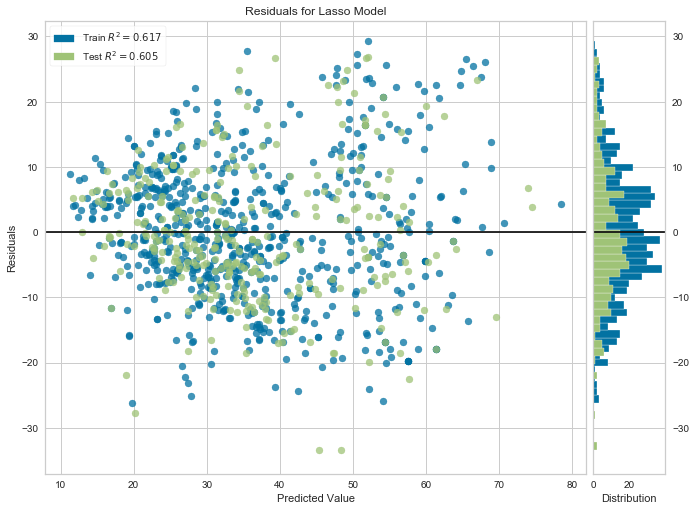

In [14]:
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(Lasso(),size= (800,600))
visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.poof()

### Task 9: Cross Validation Scores

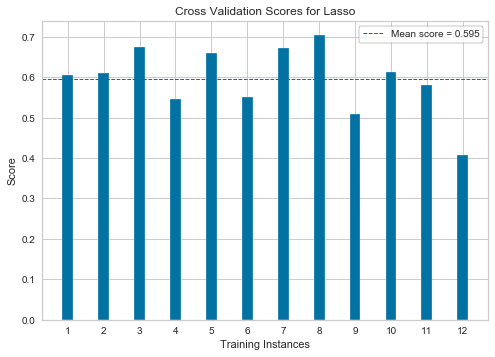

In [16]:
from sklearn.model_selection import KFold
from yellowbrick.model_selection import CVScores

_,ax= plt.subplots()

cv = KFold(12)

viz = CVScores(Lasso(),ax=ax, cv=cv, scoring = 'r2')

viz.fit(X_train,y_train).poof()


### Task 10: Learning Curves

<bound method Visualizer.poof of LearningCurve(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001AC9C902278>,
              cv=None, exploit_incremental_learning=False, groups=None,
              model=None, n_jobs=1, pre_dispatch='all', random_state=None,
              scoring='r2', shuffle=False,
              train_sizes=array([0.3       , 0.37777778, 0.45555556, 0.53333333, 0.61111111,
       0.68888889, 0.76666667, 0.84444444, 0.92222222, 1.        ]))>

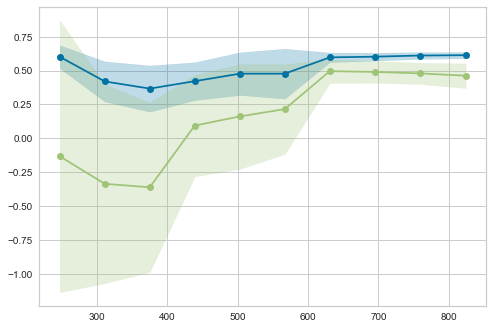

In [18]:
from yellowbrick.model_selection import LearningCurve
from sklearn.linear_model import LassoCV

sizes = np.linspace(0.3,1.0,10)

viz= LearningCurve(LassoCV(), train_sizes= sizes, scoring = 'r2')
viz.fit(X,y).poof




### Task 11:  Hyperparamter Tuning

The `AlphaSelection` Visualizer demonstrates how different values of alpha influence model selection during the regularization of linear models.

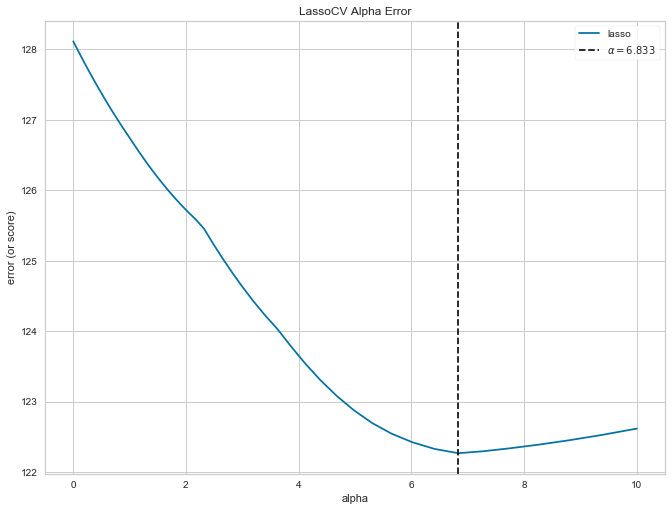

In [20]:
from yellowbrick.regressor import AlphaSelection

alphas = np.logspace(-10, 1,400)

model = LassoCV(alphas = alphas)
visualizer = AlphaSelection(model, size = (800,600))
visualizer.fit(X,y).poof()